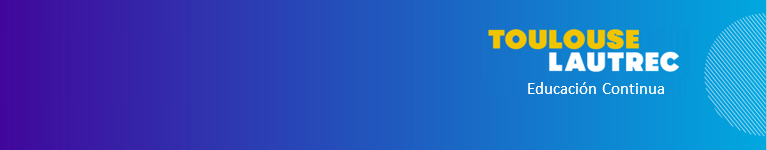

#**APRENDIZAJE AUTOMÁTICO CON PYTHON**



----------------------------
**SESIÓN N°1:** Entrenando los algoritmos de machine learning de **Sklearn** usando **Lazypredict**

**Instructor:** Luis Bautista


#**1. Lazy Predict en Python para aprendizaje automático**

- **Lazy Predict** es la única herramienta que necesita para sus proyectos de modelado predictivo.

- Es una herramienta simple y eficiente que hace que sus proyectos de modelado predictivo sean más fáciles y rápidos.

- Lazy Predict es una biblioteca de Python que proporciona una manera simple y eficiente de hacer predicciones.

- Es fácil de usar y fácil de instalar. Lazy Predict es de código abierto y se publica **bajo la licencia MIT**.

- Lazy Predict es una gran herramienta para proyectos de modelado predictivo.



#**2. Instalación y cómo importarlo**

In [ ]:
#Intalación
!pip install lazypredict

In [ ]:
#Importando las librerias
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

#**3. Ejemplo de regresión**

In [ ]:
#Importando los datos "boston"
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,USS Barnett\nFPO AP 44820
4,59982.20,5.04,7.84,4.23,26354.11,630943.49,USNS Raymond\nFPO AE 09386


In [ ]:
df.shape

(5000, 7)

In [ ]:
#Separando las variables (dependiente e independientes)
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = df['Price']


In [ ]:
# Segmentación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [ ]:
#Entrenado los modelos de regresión
models, predictions = LazyRegressor().fit(X_train, X_test, y_train, y_test)
print(models[:10])

100%|██████████| 42/42 [00:17<00:00,  2.43it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1259
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 5
[LightGBM] [Info] Start training from score 1231784.828991
                Adjusted R-Squared  R-Squared     RMSE  Time Taken
Model                                                             
LassoCV                       0.92       0.92 97534.56        0.15
Ridge                         0.92       0.92 97540.56        0.01
BayesianRidge                 0.92       0.92 97543.06        0.02
HuberRegressor                0.92       0.92 97544.27        0.03
RidgeCV                       0.92       0.92 97544.58        0.03
LassoLars                     0.92       0.92 97544.98        0.04
Lasso                         0.92       0.92 97544.99        0.01
LassoLarsIC                   0.92       0.92 97

**LazyRegressor** nos devuelve 2 variables, los modelos con los datos de entrenamiento y las predicciones de los modelos para los datos de Test. En la tabla a continuación se muestran los 10 primeros modelos para los datos de train. Tener en cuenta de que **con LazyRegressor lanzamos 38 modelos**. Como métricas para regresión están el R cuadrado y el RMSE por defecto, pero podemos elegir la métrica que queramos con el atributo *custom_metric*.

Para tener una mejor visualización, vamos tirar de seaborn y representar la métrica que seleccionemos para cada modelo. Además, lo representaremos horizontalmente para que sea más fácil leer los ejes y comparar barras.

[(0.0, 1.0)]

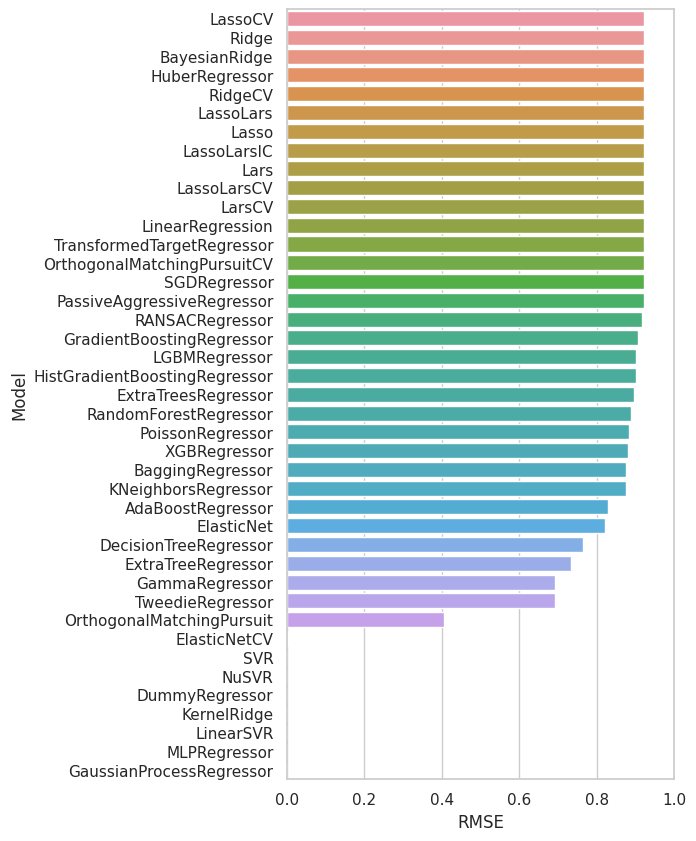

In [ ]:
#Visualizando el mejor modelo
import matplotlib.pyplot as plt
import seaborn as sns
predictions["RMSE"] = [0 if i < 0 else i for i in predictions.iloc[:,0] ]
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="RMSE", data=predictions)
ax.set(xlim=(0, 1))